<a href="https://colab.research.google.com/github/DATA3750/WeeklyDemo/blob/main/Wk1_Data_Visualization_with_Python_Matplotlib_st.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualization with Matplotlib

We'll now take an in-depth look at the Matplotlib package for visualization in Python.

Matplotlib is a multi-platform data visualization library built on NumPy arrays, and designed to work with the broader SciPy stack.


In recent years, newer tools like ggplot and ggvis in the R language, along with web visualization toolkits based on D3js and HTML5 canvas, often make Matplotlib feel clunky and old-fashioned.

And yet, Matplotlib itself will remain a vital piece of the data visualization stack, even if new tools mean the community gradually moves away from using the Matplotlib API directly.

### Importing Matplotlib

Just as we use the ``np`` shorthand for NumPy and the ``pd`` shorthand for Pandas, we will use some standard shorthands for Matplotlib imports:

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

The ``plt`` interface is what we will use most often, as we shall see throughout this chapter.

### Setting Styles

We will use the ``plt.style`` directive to choose appropriate aesthetic styles for our figures.
Here we will set the ``classic`` style, which ensures that the plots we create use the classic Matplotlib style:

In [4]:
plt.style.use('classic')

### ``show()`` or No ``show()``? How to Display Your Plots

#### Plotting from a script

If you are using Matplotlib from within a script, the function ``plt.show()`` is your friend.
``plt.show()`` starts an event loop, looks for all currently active figure objects, and opens one or more interactive windows that display your figure or figures.

The ``plt.show()`` command does a lot under the hood, as it must interact with your system's interactive graphical backend.
The details of this operation can vary greatly from system to system and even installation to installation, but matplotlib does its best to hide all these details from you.


#### Plotting from an IPython shell

It can be very convenient to use Matplotlib interactively within an IPython shell (see [IPython: Beyond Normal Python](01.00-IPython-Beyond-Normal-Python.ipynb)).
IPython is built to work well with Matplotlib if you specify Matplotlib mode.
To enable this mode, you can use the ``%matplotlib`` magic command after starting ``ipython``:

```ipython
In [1]: %matplotlib
Using matplotlib backend: TkAgg

In [2]: import matplotlib.pyplot as plt
```

After running this command (it needs to be done only once per kernel/session), any cell within the notebook that creates a plot will embed a PNG image of the resulting graphic:

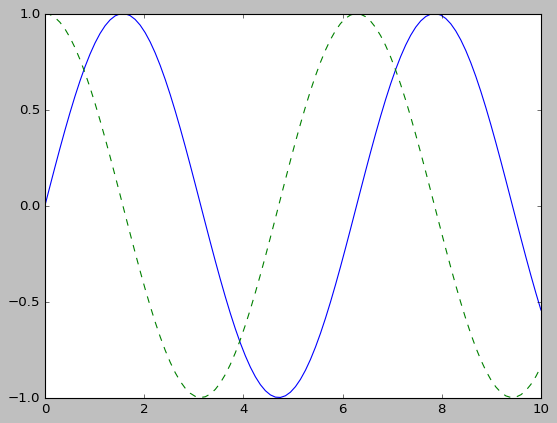

In [5]:
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

#### Plotting from an IPython notebook

The IPython notebook is a browser-based interactive data analysis tool that can combine narrative, code, graphics, HTML elements, and much more into a single executable document (see [IPython: Beyond Normal Python](01.00-IPython-Beyond-Normal-Python.ipynb)).

Plotting interactively within an IPython notebook can be done with the ``%matplotlib`` command, and works in a similar way to the IPython shell.
In the IPython notebook, you also have the option of embedding graphics directly in the notebook, with two possible options:

- ``%matplotlib notebook`` will lead to *interactive* plots embedded within the notebook
- ``%matplotlib inline`` will lead to *static* images of your plot embedded in the notebook

For this course, we will generally opt for ``%matplotlib inline``:

In [6]:
%matplotlib inline

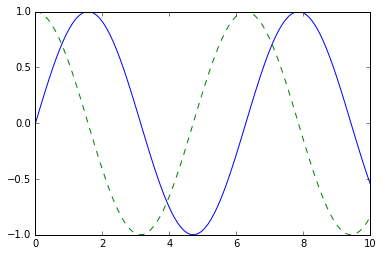

In [7]:
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

### Saving Figures to File

One nice feature of Matplotlib is the ability to save figures in a wide variety of formats.
Saving a figure can be done using the ``savefig()`` command.
For example, to save the previous figure as a PNG file, you can run this:

In [8]:
fig.savefig('my_figure.png')

We now have a file called ``my_figure.png`` in the current working directory:

In [9]:
!ls -lh my_figure.png

-rw-r--r-- 1 root root 39K Feb 15 17:05 my_figure.png


To confirm that it contains what we think it contains, let's use the IPython ``Image`` object to display the contents of this file:

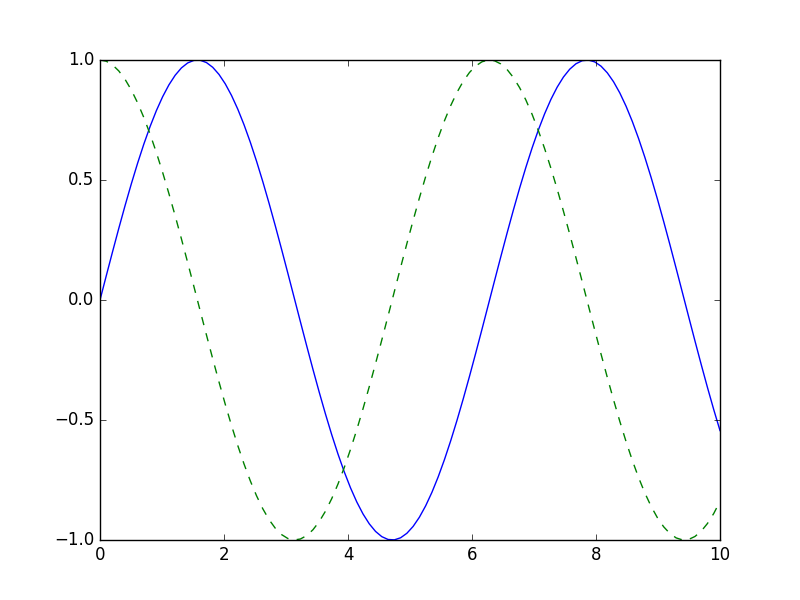

In [10]:
from IPython.display import Image
Image('my_figure.png')

In ``savefig()``, the file format is inferred from the extension of the given filename.
Depending on what backends you have installed, many different file formats are available.
The list of supported file types can be found for your system by using the following method of the figure canvas object:

In [11]:
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

Note that when saving your figure, it's not necessary to use ``plt.show()`` or related commands discussed earlier.

## Two Interfaces for the Price of One

A potentially confusing feature of Matplotlib is its dual interfaces: a convenient MATLAB-style state-based interface, and a more powerful object-oriented interface. We'll quickly highlight the differences between the two here.

#### MATLAB-style Interface

Matplotlib was originally written as a Python alternative for MATLAB users, and much of its syntax reflects that fact.
The MATLAB-style tools are contained in the pyplot (``plt``) interface.
For example, the following code will probably look quite familiar to MATLAB users:

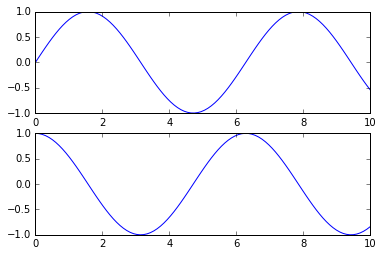

In [12]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

It is important to note that this interface is *stateful*: it keeps track of the "current" figure and axes, which are where all ``plt`` commands are applied.
You can get a reference to these using the ``plt.gcf()`` (get current figure) and ``plt.gca()`` (get current axes) routines.

While this stateful interface is fast and convenient for simple plots, it is easy to run into problems.
For example, once the second panel is created, how can we go back and add something to the first?
This is possible within the MATLAB-style interface, but a bit clunky.
Fortunately, there is a better way.

#### Object-oriented interface

The object-oriented interface is available for these more complicated situations, and for when you want more control over your figure.
Rather than depending on some notion of an "active" figure or axes, in the object-oriented interface the plotting functions are *methods* of explicit ``Figure`` and ``Axes`` objects.
To re-create the previous plot using this style of plotting, you might do the following:

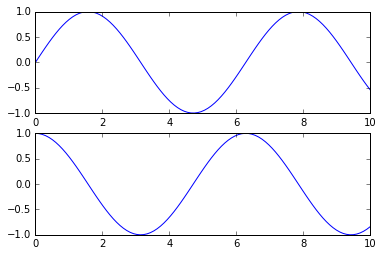

In [13]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

For more simple plots, the choice of which style to use is largely a matter of preference, but the object-oriented approach can become a necessity as plots become more complicated.
Throughout this chapter, we will switch between the MATLAB-style and object-oriented interfaces, depending on what is most convenient.
In most cases, the difference is as small as switching ``plt.plot()`` to ``ax.plot()``, but there are a few gotchas that we will highlight as they come up in the following sections.

# Salary Case Study

## Exploring Datasets with *pandas* <a id="0"></a>

*pandas* is an essential data analysis toolkit for Python. From their [website](http://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01):

> *pandas* is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, **real world** data analysis in Python.

Data Analytics with Python heavily relies on *pandas* for data wrangling, analysis, and visualization. We encourage you to spend some time and familiarize yourself with the *pandas* API Reference: [http://pandas.pydata.org/pandas-docs/stable/api.html](http://pandas.pydata.org/pandas-docs/stable/api.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).


Pandas is a python package that deals mostly with :
- **Series**  (1d homogeneous array)
- **DataFrame** (2d labeled heterogeneous array) 
- **Panel** (general 3d array)

Next, we'll do is import two key data analysis modules: *pandas* and *numpy*.


In [14]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import scipy as sp

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting
%matplotlib inline

In [21]:
df = pd.read_csv("https://raw.githubusercontent.com/Dong2Yo/Dataset/main/Salaries.csv")

### Attributes and Methods:

|  Attribute/Method | Description |
|-----|-----|
| dtype | data type of values in series |
| empty | True if series is empty |
| size | number of elements |
| values | Returns values as ndarray |
| head() | First n elements |
| tail() | Last n elements |

Execute *dir(s1)* to see all attributes and methods

In [22]:
#List first 5 records
df.head(10)


,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800
5,Prof,A,20,20,Male,122400
6,AssocProf,A,20,17,Male,81285
7,Prof,A,18,18,Male,126300
8,Prof,A,29,19,Male,94350
9,Prof,A,51,51,Male,57800


In [23]:
df.tail()

,rank,discipline,phd,service,sex,salary
73,Prof,B,18,10,Female,105450
74,AssocProf,B,19,6,Female,104542
75,Prof,B,17,17,Female,124312
76,Prof,A,28,14,Female,109954
77,Prof,A,23,15,Female,109646


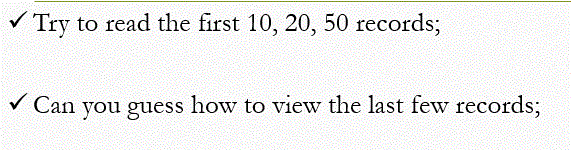

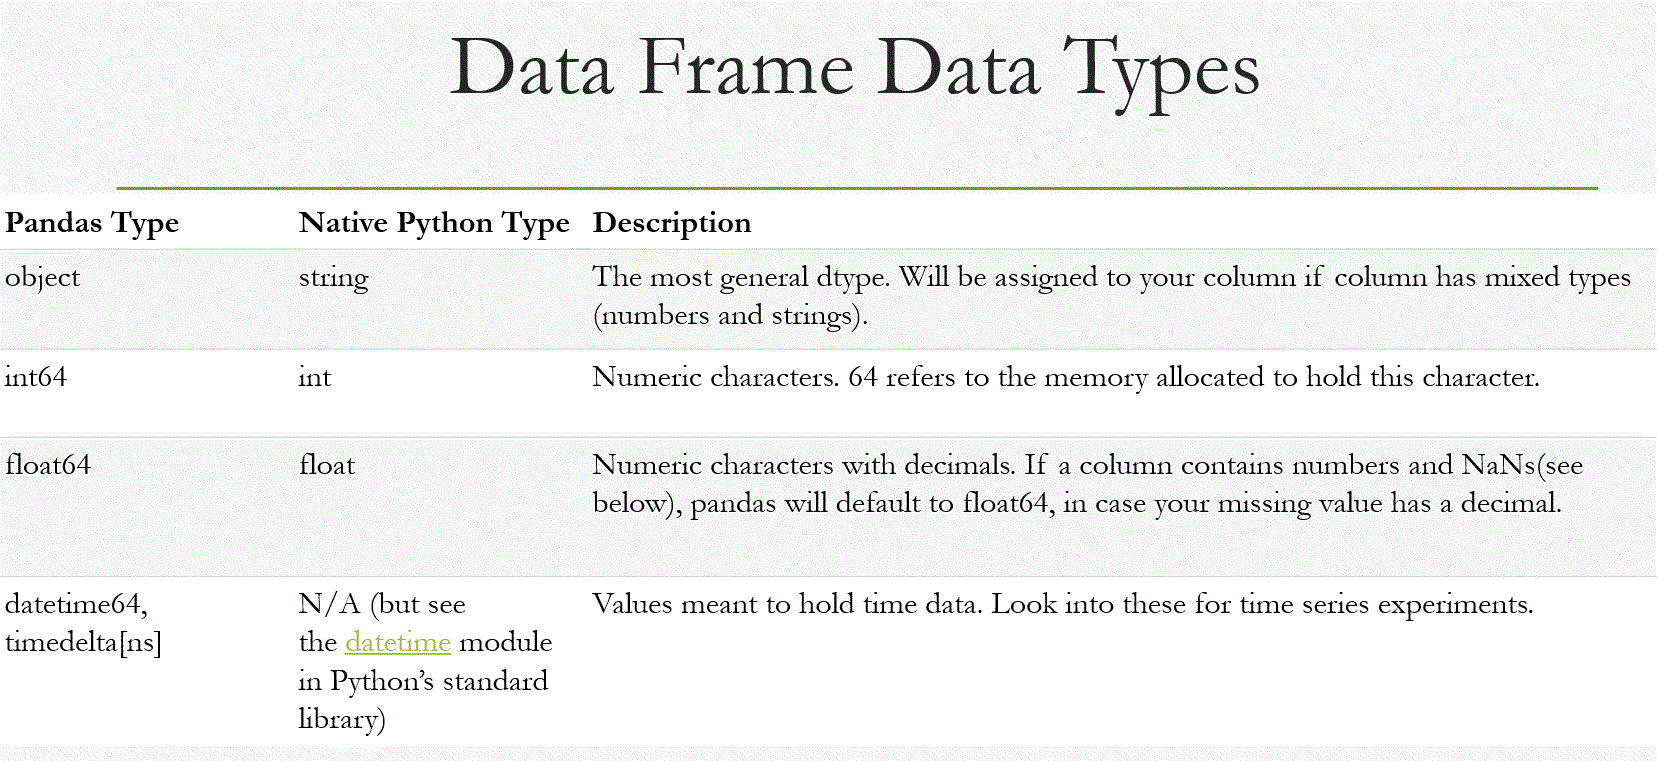

In [24]:
#Check a particular column type

df['salary'].dtype

dtype('int64')

### Check types for all the columns
df.dtypes


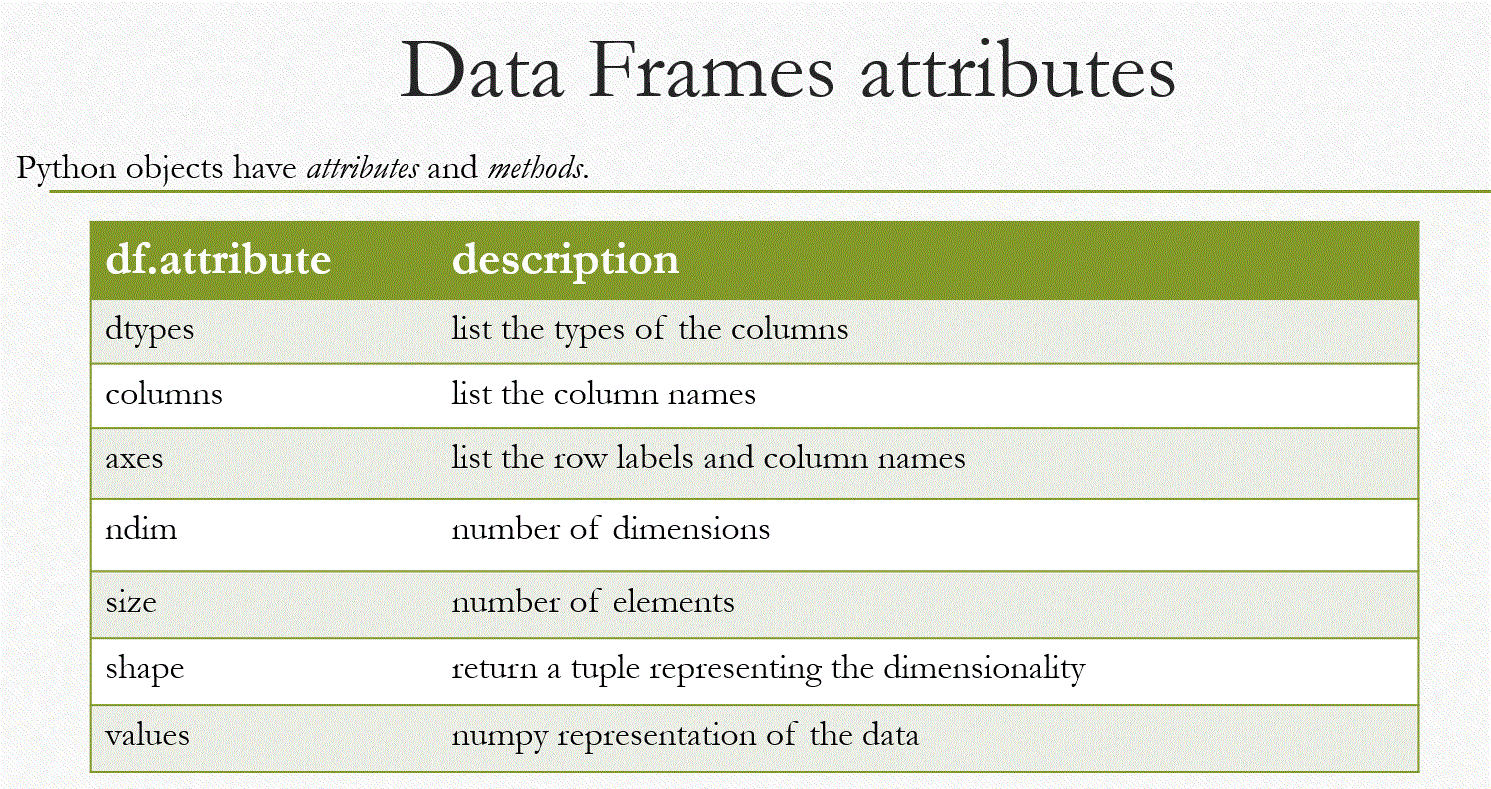

In [ ]:
#Display a few first records


In [ ]:
# Display structure of the data frame


Sometimes the column names in the input file are too long or contain special characters. In these cases to make it easier to work with these columns, we need to rename them.

In [26]:
# Let's create a copy of this dataframe with a new column names
# If we do not want to create a new data frame, we can add inplace=True argument
df_new =df.rename(columns={
        'discipline': 'subject', 
        'sex': 'gender'
    })

---
*Exercise* 

In [ ]:
#Display first 10 records
# <your code goes here>


In [ ]:
#Display first 20 records
# <your code goes here>


In [ ]:
#Display the last 5 records
# <your code goes here>


### Data Exploration

In [43]:
#Identify the type of df object


In [44]:
#Check the type of a column "salary"


In [45]:
#List the types of all columns


In [46]:
#List the column names


In [47]:
#List the row labels and the column names


In [48]:
#Total number of elements in the Data Frame


In [49]:
#Number of rows and columns


In [50]:
#Output basic statistics for the numeric columns


*Get help*   
df.describe?

In [51]:
df.describe?

In [52]:
#calculate mean for all numeric columns


In [53]:
# Create a new column


In [54]:
# Check how many unique values in a column


In [55]:
# Get frequency table for a categorical or binary column


In [56]:
# Get a proportion table


In [57]:
#Alternatively we can use pandas function crosstab()


In [58]:
# Two-way tables


---
### Data slicing and grouping

In [59]:
#Extract a column by name 
df['sex'].head()

0    Male
1    Male
2    Male
3    Male
4    Male
Name: sex, dtype: object

In [60]:
# Calculate median number of service years
df.service.median()

14.5

---
### Data grouping

In [61]:
#Group data using rank
df_rank = df.groupby('rank')

In [62]:
#Calculate mean of all numeric columns for the grouped object
df_rank.mean()

,phd,service,salary
rank,,,
AssocProf,15.076923,11.307692,91786.230769
AsstProf,5.052632,2.210526,81362.789474
Prof,27.065217,21.413043,123624.804348


In [63]:
#Calculate the mean salary for men and women. The following produce Pandas Series (single brackets around salary)
df.groupby('sex')['salary'].mean()

sex
Female    101002.410256
Male      115045.153846
Name: salary, dtype: float64

In [64]:
# Group using 2 variables - sex and rank:
df.groupby(['rank','sex'], sort=True)[['salary']].mean()

salary
rank      sex                  
AssocProf Female   88512.800000
          Male    102697.666667
AsstProf  Female   78049.909091
          Male     85918.000000
Prof      Female  121967.611111
          Male    124690.142857

---
### Filtering

In [65]:
#Select observation with the value in the salary column > 120K
df_sub = df[ df.salary > 120000]
df_sub.head()

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
3,Prof,A,40,31,Male,131205
5,Prof,A,20,20,Male,122400
7,Prof,A,18,18,Male,126300
10,Prof,B,39,33,Male,128250


In [ ]:
#Select data for female professors


### Explore data using graphics

In [66]:
#Show graphs withint Python notebook
%matplotlib inline

(array([2.97782119e-06, 1.48891059e-05, 1.19112848e-05, 1.38964989e-05,
        8.93346356e-06, 1.09186777e-05, 3.97042825e-06, 7.94085650e-06,
        9.92607063e-07, 9.92607063e-07]),
 array([ 57800.,  70716.,  83632.,  96548., 109464., 122380., 135296.,
        148212., 161128., 174044., 186960.]),
 <a list of 10 Patch objects>)

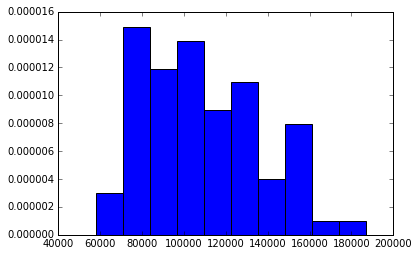

In [67]:
#Use matplotlib to draw a histogram of a salary data
plt.hist(df['salary'], bins = 10, density= True)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


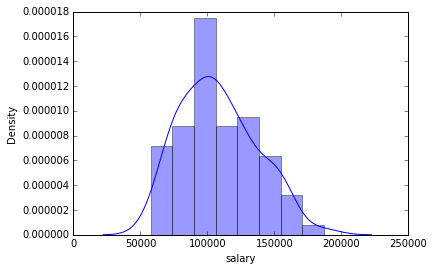

In [68]:
#Use seaborn package to draw a histogram
sns.distplot(df['salary'])

In [ ]:
# Use regular matplotlib function to display a barplot


In [ ]:
# Use seaborn package to display a barplot




In [ ]:
# Split into 2 groups:


In [ ]:
#Violinplot


In [ ]:
#Scatterplot in seaborn


In [ ]:
#If we are interested in linear regression plot for 2 numeric variables we can use regplot


In [ ]:
# box plot


In [ ]:
# side-by-side box plot


In [ ]:
# swarm plot


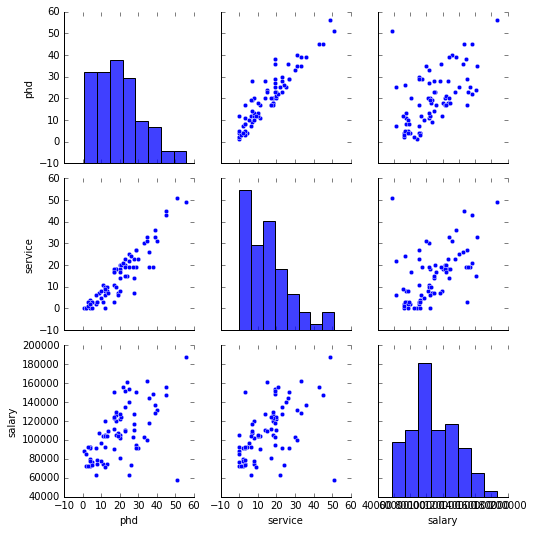

In [69]:
# Pairplot 
sns.pairplot(df)

### Linear Regression

In [70]:
# Import Statsmodel functions:
import statsmodels.api as sm

In [71]:
# create a fitted model
lm = sm.OLS(df.service, df.salary).fit()

#print model summary
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                service   R-squared (uncentered):                   0.704
Model:                            OLS   Adj. R-squared (uncentered):              0.700
Method:                 Least Squares   F-statistic:                              183.1
Date:                Wed, 15 Feb 2023   Prob (F-statistic):                    4.78e-22
Time:                        17:12:17   Log-Likelihood:                         -294.05
No. Observations:                  78   AIC:                                      590.1
Df Residuals:                      77   BIC:                                      592.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [72]:
# print the coefficients
lm.params

salary    0.000145
dtype: float64

In [73]:
#using scikit-learn:
from sklearn import linear_model
est = linear_model.LinearRegression(fit_intercept = True)   # create estimator object
est.fit(df[['service']], df[['salary']])

#print result
print("Coef:", est.coef_, "\nIntercept:", est.intercept_)


Coef: [[1240.3566535]] 
Intercept: [89354.82421525]


---
### T-test

In [74]:
# Using scipy package:
from scipy import stats
df_w = df[ df['sex'] == 'Female']['salary']
df_m = df[ df['sex'] == 'Male']['salary']
stats.ttest_ind(df_w, df_m)   

Ttest_indResult(statistic=-2.2486865976699053, pvalue=0.027429778657910103)